In [2]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import datetime
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [3]:
#Load the dataset
cocacola=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


We have 42 quarters depicting  the sales of cocacola from 10 years(1986-1996).

In [4]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

We need to convert Quarter object type into Date datetime type.

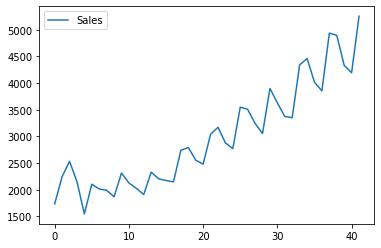

In [5]:
cocacola.plot()

The sales of cocacola is being increased continuously every year. The trend is positive and upwards.

In [6]:
#Covert Quarter to Date format (YYYY-MM-DD)
cocacola['date'] = pd.to_datetime('19'+cocacola['Quarter'].str[-2:] + cocacola['Quarter'].str[:2])

In [7]:
cocacola.head()

,Quarter,Sales,date
0,Q1_86,1734.827000,1986-01-01
1,Q2_86,2244.960999,1986-04-01
2,Q3_86,2533.804993,1986-07-01
3,Q4_86,2154.962997,1986-10-01
4,Q1_87,1547.818996,1987-01-01


In [9]:
#Drop Quarter column
cocacola=cocacola.drop(['Quarter'],axis=1)

In [10]:
cocacola.dtypes

Sales           float64
date     datetime64[ns]
dtype: object

In [11]:
cocacola=cocacola.set_index(['date'])

In [12]:
cocacola.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


I will upsample the data from quarters to months to get more number of data points for better interpretation

In [13]:
upsampled=cocacola.resample('M').mean()

In [14]:
upsampled.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN


Fill the nan values by Interpolation technique

In [15]:
interpolated=upsampled.interpolate(method='linear')
interpolated.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330


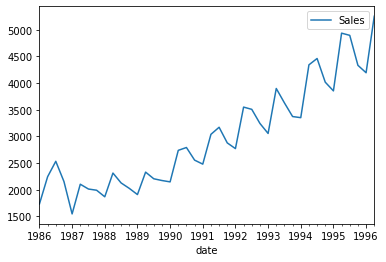

In [16]:
#Make a copy of the dataset
series=interpolated.copy()
series.plot()

We see that there is more sales in the mid of the year and gradually decreases for that year.

In [ ]:
series.shape

(124, 1)

There are 124 months in our dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa172db4ad0>]],
      dtype=object)

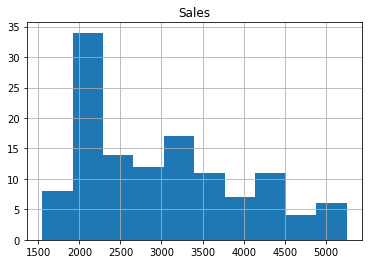

In [19]:
#Histogram
series.hist()

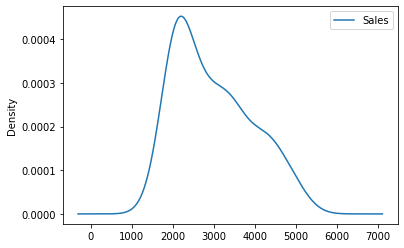

In [20]:
#Density plot
series.plot(kind='kde')

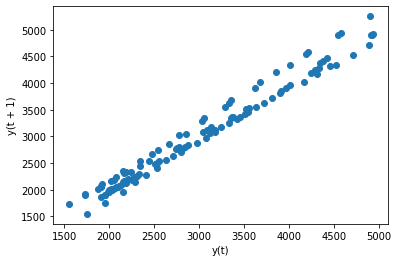

In [21]:
#lag plot
lag_plot(series)
plt.show()

We see that the sales of a year is strongly correlated with that of its previouys year sales.

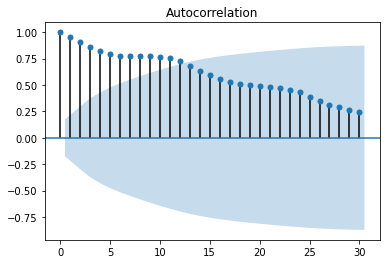

In [22]:
plot_acf(series,lags=30)
plt.show()

The correlation of sales is significant upto 12 years previous records and insignificant after 12 years.

Next, We shall reset the index for further pre processing.

In [23]:
series.reset_index(inplace=True)

In [24]:
series.head()

,date,Sales
0,1986-01-31,1734.827000
1,1986-02-28,1904.871666
2,1986-03-31,2074.916332
3,1986-04-30,2244.960999
4,1986-05-31,2341.242330


In [25]:
#Let us impute certain data or features for model building
series['t']=np.arange(1,125)
series['t_squared']=series['t']*series['t']
series['Log_sales']=np.log(series['Sales'])
series['month']=series.date.dt.strftime('%b')
series['year']=series.date.dt.strftime('%Y')

month_dummies=pd.DataFrame(pd.get_dummies(series['month']))
series=pd.concat([series,month_dummies],axis=1)


In [26]:
series.head()

,date,Sales,t,t_squared,Log_sales,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1986-01-31,1734.827000,1,1,7.458663,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,7.552170,Feb,1986,0,0,0,1,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,7.637676,Mar,1986,0,0,0,0,0,0,0,1,0,0,0,0
3,1986-04-30,2244.960999,4,16,7.716443,Apr,1986,1,0,0,0,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,7.758437,May,1986,0,0,0,0,0,0,0,0,1,0,0,0


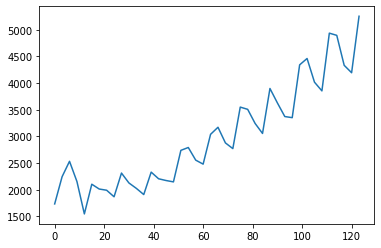

In [27]:
series.Sales.plot()

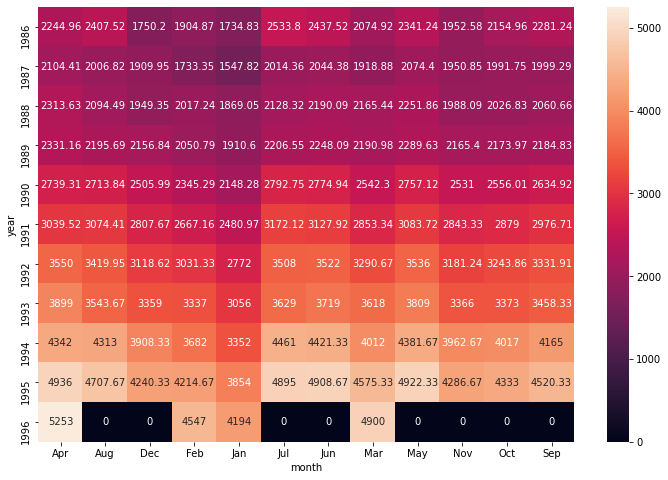

In [54]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=series,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

There were more sales in April month of 1996. We don't have the sales data for the months after Apr-1996 and hence shows 0.

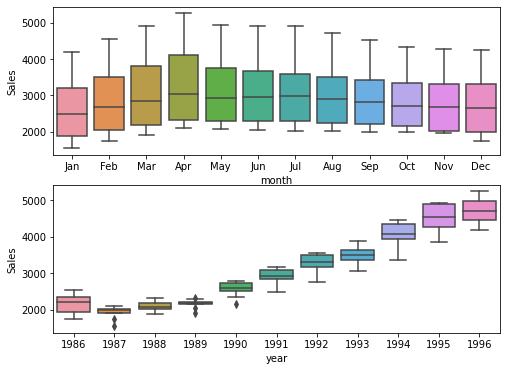

In [55]:
# Boxplot for every month
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=series)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=series)


More cocacola sales are observed in the month of March and April of every month. The sales have also increased for every year.

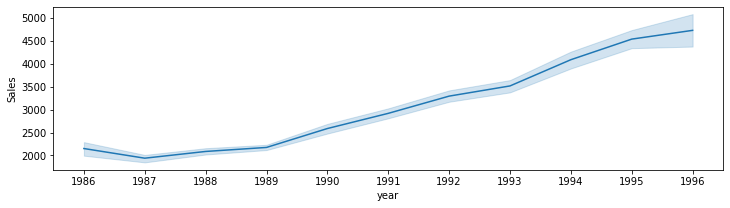

In [28]:
import seaborn as sns
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=series)

Linear trend in sales

In [29]:
#Splitting the data into Train and Test
Train = series.head(len(series.date)-12)
Test = series.tail(12)

In [30]:
#Linear model
import statsmodels.formula.api as smf
lin_model=smf.ols('Sales~t',data=Train).fit()
lin_pred=pd.Series(lin_model.predict(pd.DataFrame(Test['t'])))
rmse_lin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(lin_pred))**2))


rmse_lin

561.9428078334439

In [31]:
#Exponential model
exp_model=smf.ols('Log_sales~t',data=series).fit()
exp_pred=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(exp_pred))**2))

rmse_exp

4645.293932753723

In [33]:
#Quadratic model 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

rmse_Quad

416.12404736256167

In [34]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

rmse_add_sea

1840.3042900245844

In [39]:
#Additive Seasonality with Linear trend

add_sea_lin = smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_lin))**2))


rmse_add_sea_lin

461.566374212705

In [40]:
#Additive Seasonality with Quadratic trend

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))


rmse_add_sea_quad

271.9062333127314

In [42]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))

rmse_Mult_sea

1939.0823781993013

In [44]:
#Multiplicative Seasonality with linear trend

Mul_Add_sea = smf.ols('Log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

236.2636402037818

In [46]:
#Multiplicative Seasonality with Quadratic trend

Mul_quad = smf.ols('Log_sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_quad_sea = pd.Series(Mul_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_Mult_quad_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_quad_sea)))**2))
rmse_Mult_quad_sea

544.8723908117315

In [50]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_lin","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_quad_sea"]),"RMSE_Values":pd.Series([rmse_lin,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_quad_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,rmse_Mult_add_sea,236.263640
5,rmse_add_sea_quad,271.906233
2,rmse_Quad,416.124047
4,rmse_add_sea_lin,461.566374
8,rmse_Mult_quad_sea,544.872391
0,rmse_linear,561.942808
3,rmse_add_sea,1840.304290
6,rmse_Mult_sea,1939.082378
1,rmse_Exp,4645.293933


rmse_Mult_add_sea has low rmse value. Hence, we can say that our data follows a linear trend with Multiplicative seasonality.

In [53]:
#Build the model on entire data set
model_full = smf.ols('Log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=series).fit()

model_full can be be used to predict or forecast the sales in the coming months or years.

##Data driven models

Let us also forecast the sales using data driven models

MOving Average

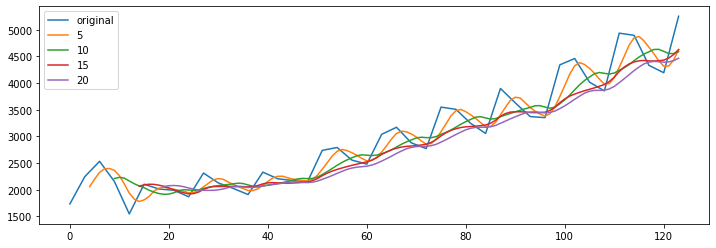

In [61]:
plt.figure(figsize=(12,4))
series.Sales.plot(label='original')
for i in range(5,25,5): #Window chosen is 5,10,15 and 20
    series['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In order to view the TSE plot(Trend,Seasonality,Error or residuals), we need to set the index to Date.

In [63]:
series1=series.set_index(['date'])

In [64]:
series1.index

DatetimeIndex(['1986-01-31', '1986-02-28', '1986-03-31', '1986-04-30',
               '1986-05-31', '1986-06-30', '1986-07-31', '1986-08-31',
               '1986-09-30', '1986-10-31',
               ...
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31', '1996-01-31', '1996-02-29',
               '1996-03-31', '1996-04-30'],
              dtype='datetime64[ns]', name='date', length=124, freq=None)

In [65]:
#Set the frequency to months
series1=series1.asfreq('M')

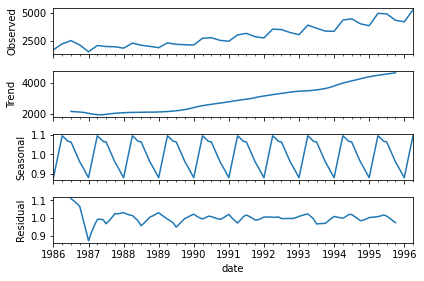

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts=seasonal_decompose(series1.Sales,model='multiplicative')
decompose_ts.plot()
plt.show()

Here, we see that the Trend is Linear and the Seasonality is Additive.

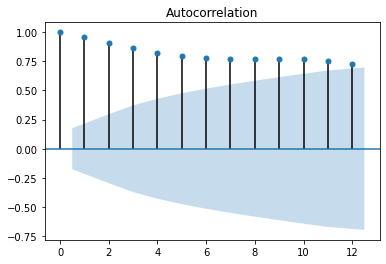

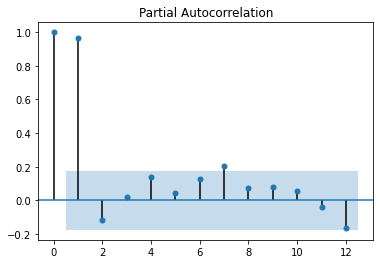

In [67]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(series.Sales,lags=12)
tsa_plots.plot_pacf(series.Sales,lags=12)
plt.show()

In [85]:
#Evaluation metric
def MAPE(pred,org):
    error=np.abs((pred-org))*100/org
    return np.mean(error)

In [86]:
#Simple exponential method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


7.5289201512217145

In [97]:
#Holt method
from statsmodels.tsa.holtwinters import Holt
holt_model=Holt(Train['Sales']).fit(smoothing_level=0.2,smoothing_slope=0.2)
pred_holt=holt_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_holt,Test.Sales)

7.780038647775863

In [90]:
# Holts winter exponential smoothing with additive seasonality and additive tren
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


10.698676296887106

In [91]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


15.748445717141452

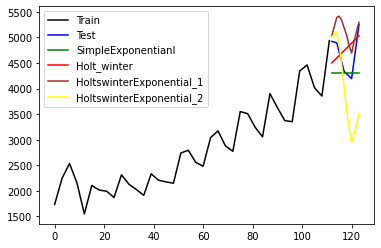

In [98]:
#Visualisation of Forecasted values for Test dataset using different methods
plt.plot(Train.index,Train['Sales'],label='Train',color='black')
plt.plot(Test.index,Test['Sales'],label='Test',color='blue')
plt.plot(pred_ses.index,pred_ses,label='SimpleExponentianl',color='green')
plt.plot(pred_holt.index,pred_holt,label='Holt_winter',color='red')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label='HoltswinterExponential_1',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label='HoltswinterExponential_2',color='yellow')
plt.legend(loc='best')

We can see that Holt winter model gives the least error but Holt Winter Exponential model gives us some similar pattern with the Test sales of our dataset.